In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv("Mobile phone price.csv")
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [3]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [5]:
df.dropna()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Assuming df is your DataFrame
categorical_columns = ['Brand', 'Model','Storage ', 'RAM ', 'Screen Size (inches)',
                'Camera (MP)', 'Price ($)']  # Add other categorical columns as needed

# Use LabelEncoder to fit and transform each categorical column
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
    

# Display the DataFrame after label encoding
print(df)


     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   
406     12     96         0    14                    31           57   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Brand                   407 non-null    int32
 1   Model                   407 non-null    int32
 2   Storage                 407 non-null    int32
 3   RAM                     407 non-null    int32
 4   Screen Size (inches)    407 non-null    int32
 5   Camera (MP)             407 non-null    int32
 6   Battery Capacity (mAh)  407 non-null    int64
 7   Price ($)               407 non-null    int32
dtypes: int32(7), int64(1)
memory usage: 14.4 KB


In [8]:
x = df.drop(columns="Price ($)").values
y = df["Price ($)"].values

In [34]:
#split the data in to train test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [35]:
print("independent data\n",x)
print("dependent data\n",y)

independent data
 [[   0  232    1 ...    8   15 3095]
 [  12  100    4 ...   35    0 5000]
 [   9   19    1 ...   31   53 4500]
 ...
 [   0  229    0 ...   31   17 3687]
 [  10  188    0 ...   15   59 4025]
 [  12   96    0 ...   31   57 4500]]
dependent data
 [88 45 85 63 84 84 88 60 81 45 66 74 66 81 45 66 84 56 64 70 54 63 60 82
 63 78 49 64 49 55 74 54 71 61 63 52 58 71 56 76 52 46 55 71 77 81 69 56
 52 54 55 43 53 87 75 59 56 47 60 73 80 56 71 62 59 74 68 58 76 54 53 59
 66 69 78 84 49 36 36 29 35 23 29 41 35 35 34  1 41 38 29 31 22 17 25 17
 18 16 25 35 35 20 41 39  0  6  5 40 35 40 11  8 41 33 29 36  9 13 16  6
 11 18  9 38 17 14 29 15  6 18 23  6 34 31 18 11 29  9 29  2 13  6 20 18
  6 10  8 28  0 20 13 20  6 16 13 16  9 20 21  9 26 25 33 11 14 20  4 31
 33 18 29 37 18 20 16  6 11 32 23 18 26 17 23 20 20 15 23  6 10 31 29 16
 10 12 11 20 23 16  6  3 13 18 20 17 24 20 22 18 30 17 11  7  9 20  6  8
 40  6  5 18 13  6 30 18 27  6  8 23  9 23 31 29 19  6 31 11  9 14 12  5
 40 11 3

In [28]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [36]:
#check shape of the data 
print("x_train and x_test dataset shape",x_train.shape,x_test.shape)
print("y_train and y_test dataset shape",y_train.shape,y_test.shape)

x_train and x_test dataset shape (325, 7) (82, 7)
y_train and y_test dataset shape (325,) (82,)


In [37]:
# call model and fit the model using train data
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

In [38]:
#print r2 value
regressor.score(x_test,y_test)

0.4567959793259111

In [32]:
# find actual vs prediction
y_pred = regressor.predict(x_test)

In [33]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = pred.head(10)
df1

,Actual,Predicted
0,54,27.701427
1,11,32.467979
2,59,51.125300
3,24,32.454936
4,20,37.027618
5,25,45.131726
6,18,34.150945
7,71,67.337849
8,84,81.290147
9,18,38.976554


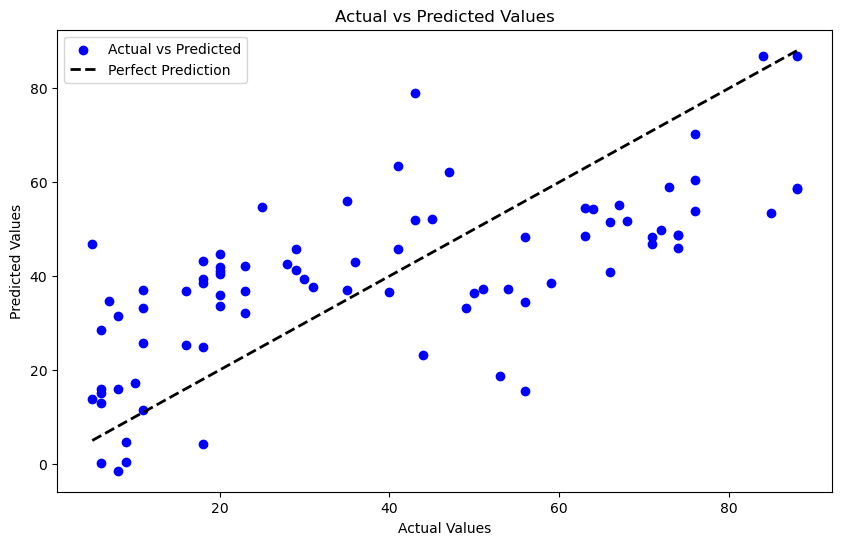

In [113]:
import matplotlib.pyplot as plt

# Assuming pred is your DataFrame with 'Actual' and 'Predicted' columns
plt.figure(figsize=(10, 6))

# Scatter plot for Actual vs Predicted values
plt.scatter(pred['Actual'], pred['Predicted'], c='blue', marker='o', label='Actual vs Predicted')

# Plot a diagonal line for reference (perfect prediction)


# Set plot labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:

import matplotlib.pyplot as plt

# Assuming pred is your DataFrame with 'Actual' and 'Predicted' columns
df1 = pred.head(10)

# Plot the actual and predicted values using a line plot
plt.figure(figsize=(10, 6))
plt.plot(df1['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(df1['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

# Set plot labels and title
plt.title('Actual vs Predicted Values (First 10 Records)')
plt.xlabel('Sample')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
plt.plot([pred['Actual'].min(), pred['Actual'].max()], [pred['Actual'].min(), pred['Actual'].max()], 'k--', lw=2, label='Perfect Prediction')



In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming df is your DataFrame
imputer = SimpleImputer(strategy='mean')  # You can use 'most_frequent' for categorical data like 'Brand'

# Replace missing values in the 'Brand' column
df['Battery Capacity (mAh)'] = imputer.fit_transform(df[['Battery Capacity (mAh)']])

# Display the DataFrame after imputation
print(df)
